<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chi-Squared" data-toc-modified-id="Chi-Squared-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chi-Squared</a></span></li><li><span><a href="#Exercise-6b" data-toc-modified-id="Exercise-6b-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 6b</a></span></li><li><span><a href="#Exercise-6c" data-toc-modified-id="Exercise-6c-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 6c</a></span></li></ul></div>

# Chi-Squared

$$
\chi ^ { 2 } = \sum _ { i = 1 } ^ { N } \frac { \left[ y _ { i } - f \left( x _ { i } \right) \right] ^ { 2 } } { \sigma _ { y i } ^ { 2 } } \equiv [ Y - A X ] ^ { \top } C ^ { - 1 } [ Y - A X ]
$$

bestfitvar =
 [[ 3.32922601e+02 -1.88954491e+00]
 [-1.88954491e+00  1.16166311e-02]] 

bestfit= [34.04772776  2.23992083]

bestfitbiexp =  [44.19974282  2.22069079]
Creating:  ex6a.png


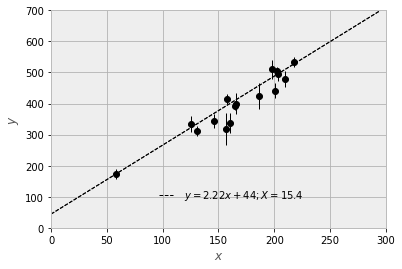

In [1]:
def ex6a():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import scipy.optimize as spo
    plt.rcParams["figure.figsize"] = [10, 8]
    %matplotlib inline

    import scipy.linalg as linalg

    # load data
    df = pd.read_csv('data_allerr.dat',sep='&')
    df.columns = [i.strip('#').strip() for i in df.columns]


    # matrices A,C, Y, yerr
    df1 = df.iloc[4:, :]
    x = df1.x.values
    y = df1.y.values
    yerr = df1['sigm_y'].values  # sigma y is yerr

    degree = 1
    X = x
    Y = y
    A = np.vander(x, degree+1, increasing=True).astype(float)  # 1, x, x**2
    C = np.diag(yerr*yerr)  # diagonal matrix of yerr**2

    # Bestfit
    cinv = linalg.inv(C)
    cinv_y = cinv @ Y.T
    at_cinv_y = A.T @ cinv_y

    cinv_a = cinv @ A
    at_cinv_a = A.T @ cinv_a

    bestfitvar = linalg.inv(at_cinv_a)
    bestfit = bestfitvar @ at_cinv_y  # bestfit = params = c,b,a for ax**2 + bx + c
    print('bestfitvar =\n', bestfitvar, '\n\nbestfit=', bestfit)

    # Log of bi-exponential cost function
    def logbiexp(mb,X,Y,yerr):
        b,m = mb
        abs_err = np.fabs(Y -m*X -b)
        return np.sum(abs_err/yerr)

    # Optimize bi-exponential objective function using bestfit
    bestfitbiexp = spo.optimize.fmin(logbiexp,bestfit,(X,Y,yerr),disp=False)
    print('\nbestfitbiexp = ', bestfitbiexp)

    # plot errorbar
    plt.errorbar(X,Y,yerr,color='k',marker='o',linestyle='None')

    # Plot the best fit line
    nsamples = 1001
    plt.xlim(0,300)
    plt.ylim(0,700)
    xs = np.linspace(plt.xlim()[0],plt.xlim()[1],nsamples)
    b,m = bestfitbiexp
    ys = m * xs + b
    sgn_str = '-' if b < 0 else '+'
    cost = logbiexp(bestfitbiexp,X,Y,yerr)
    label = '$y = {:4.2f}x {} {:2.0f}; X = {:3.1f}$'.format(m,sgn_str,np.abs(b),cost)
    plt.plot(xs,ys,color='k',ls='--',label=label)

    # legends and limits
    l = plt.legend(loc=(.3,.1),numpoints=8)
    l.draw_frame(False)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.plot(xs,ys,'k--')
    filename = 'ex6a.png'
    print('Creating: ', filename)
    plt.savefig(filename)
    plt.show()
if __name__ == '__main__':
    # run the program
    ex6a()

# Exercise 6b

bestfitvar =
 [[ 3.32922601e+02 -1.88954491e+00]
 [-1.88954491e+00  1.16166311e-02]] 

bestfit= [34.04772776  2.23992083]
[34.04772776  2.23992083]
Performing 10 runs of the simulating basinhopping optimization algorithm
[34.58274859  2.26806528]
Creating:  ex6b.png


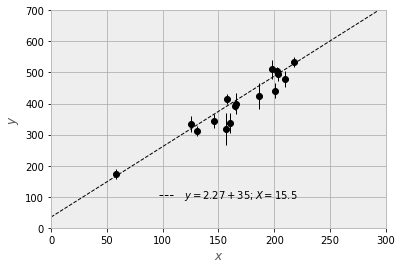

In [2]:
def ex6b():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import scipy.optimize as spo
    plt.rcParams["figure.figsize"] = [10, 8]
    %matplotlib inline

    import scipy.linalg as linalg

    # load data
    df = pd.read_csv('data_allerr.dat',sep='&')
    df.columns = [i.strip('#').strip() for i in df.columns]

    # matrices A,C, Y, yerr
    df1 = df.iloc[4:, :]
    x = df1.x.values
    y = df1.y.values
    yerr = df1['sigm_y'].values  # sigma y is yerr

    degree = 1
    X = x
    Y = y
    A = np.vander(x, degree+1, increasing=True).astype(float)  # 1, x, x**2
    C = np.diag(yerr*yerr)  # diagonal matrix of yerr**2

    # Bestfit
    cinv = linalg.inv(C)
    cinv_y = cinv @ Y.T
    at_cinv_y = A.T @ cinv_y

    cinv_a = cinv @ A
    at_cinv_a = A.T @ cinv_a

    bestfitvar = linalg.inv(at_cinv_a)
    bestfit = bestfitvar @ at_cinv_y  # bestfit = params = c,b,a for ax**2 + bx + c
    print('bestfitvar =\n', bestfitvar, '\n\nbestfit=', bestfit)
    
    # Log of bi-exponential cost function
    def logbiexp(mb,X,Y,yerr):
        b,m = mb
        abs_err = np.fabs(Y -m*X -b)
        return np.sum(abs_err/yerr)

    initialguess= np.array([bestfit[0],bestfit[1]])
    nsample = len(X)
    initialchisq= nsample*10.
    chisq= initialchisq
    bestfit= initialguess
    print(bestfit)

    print("Performing 10 runs of the simulating basinhopping optimization algorithm")
    for jj in range(10):
        np.random.seed(jj+1) 
        minimizer_kwargs = {"args": (X,Y,yerr)}
        bestfitbiexp= spo.basinhopping(logbiexp,x0=initialguess,
                                            minimizer_kwargs=minimizer_kwargs,niter=100)

    if bestfitbiexp.fun < chisq:
        bestfit= bestfitbiexp.x
        chisq= bestfitbiexp.fun

    bestfitsbiexp= bestfit
    print(bestfitsbiexp)

    # Plot data
    plt.errorbar(X,Y,yerr,color='k',marker='o',linestyle='None')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.xlim(0,300)
    plt.ylim(0,700)
    xmin, xmax= plt.xlim()
    nsamples= 1001
    xs= np.linspace(xmin,xmax,nsamples)
    ys = bestfitsbiexp[1] * xs + bestfitsbiexp[0]
    sgn_str = '-' if bestfitsbiexp[0] < 0 else '+'

    label= r'$y = {:4.2f} {} {:4.0f}; X ={:3.1f}$'.format(
        bestfitsbiexp[1],sgn_str,np.fabs(bestfitsbiexp[0]),chisq)

    plt.plot(xs,ys,color='k',ls='--',label=label)

    l=plt.legend(loc=(.3,.1),numpoints=8)
    l.draw_frame(False)
    plt.xlim(0,300)
    plt.ylim(0,700)
    filename = 'ex6b.png'
    print('Creating: ', filename)
    plt.savefig(filename)
    plt.show()
if __name__ == '__main__':
    # run the program
    ex6b()

# Exercise 6c

bestfitvar =
 [[ 3.32922601e+02 -1.88954491e+00]
 [-1.88954491e+00  1.16166311e-02]] 

bestfit= [34.04772776  2.23992083]
bestfitsbiexp =  [44.20171344  2.21868695]
Creating:  ex6c.png


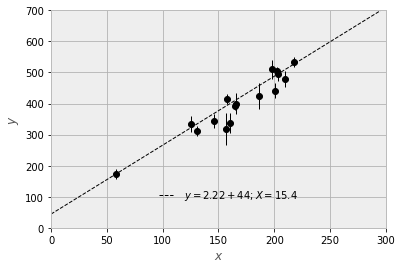

In [3]:
def ex6c():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import scipy.optimize as spo
    from scipy import stats
    np.random.seed(100)
    plt.rcParams["figure.figsize"] = [10, 8]
    %matplotlib inline

    import scipy.linalg as linalg

    # load data
    df = pd.read_csv('data_allerr.dat',sep='&')
    df.columns = [i.strip('#').strip() for i in df.columns]

    # matrices A,C, Y, yerr
    df1 = df.iloc[4:, :]
    x = df1.x.values
    y = df1.y.values
    yerr = df1['sigm_y'].values  # sigma y is yerr
    nsample = len(x)

    degree = 1
    X = x
    Y = y
    A = np.vander(x, degree+1, increasing=True).astype(float)  # 1, x, x**2
    C = np.diag(yerr*yerr)  # diagonal matrix of yerr**2

    # Bestfit
    cinv = linalg.inv(C)
    cinv_y = cinv @ Y.T
    at_cinv_y = A.T @ cinv_y

    cinv_a = cinv @ A
    at_cinv_a = A.T @ cinv_a

    bestfitvar = linalg.inv(at_cinv_a)
    bestfit = bestfitvar @ at_cinv_y  # bestfit = params = c,b,a for ax**2 + bx + c
    print('bestfitvar =\n', bestfitvar, '\n\nbestfit=', bestfit)

    initialguess= np.array([bestfit[0],bestfit[1]])

    # With this initial guess start off the sampling procedure
    abs_err = np.fabs(Y-bestfit[1]*X-bestfit[0])
    initialX= np.sum(abs_err/yerr)
    currentX= initialX
    bestX= initialX
    bestfit= initialguess
    currentguess= initialguess
    naccept= 0

    # Log of bi-exponential cost function
    def logbiexp(mb,X,Y,yerr):
        b,m = mb
        abs_err = np.fabs(Y -m*X -b)
        return np.sum(abs_err/yerr)

    nburn = 100
    parsigma=[5,.075]
    nsamples=10000
    for jj in range(nburn+nsamples):
        #Draw a sample from the proposal distribution
        newsample= np.zeros(2)
        newsample[0]= currentguess[0]+stats.norm.rvs()*parsigma[0]
        newsample[1]= currentguess[1]+stats.norm.rvs()*parsigma[1]
        #Calculate the objective function for the newsample
        newX= logbiexp(newsample,X,Y,yerr)
        #Accept or reject
        #Reject with the appropriate probability
        u= stats.uniform.rvs()
        if u < np.exp(currentX-newX):
            #Accept
            currentX= newX
            currentguess= newsample
            naccept= naccept+1
        if currentX < bestX:
            bestfit= currentguess
            bestX= currentX
    bestfitsbiexp= bestfit
    print('bestfitsbiexp = ', bestfitsbiexp)

    
    cond1 = np.float64(naccept)/(nburn+nsamples)
    cond2 = np.float64(naccept)/(nburn+nsamples) > .8
    if cond1 < .5 or cond2:
        print("Acceptance ratio was "+str(np.float64(naccept)/(nburn+nsamples)))

    # Plot data
    plt.errorbar(X,Y,yerr,color='k',marker='o',linestyle='None')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.xlim(0,300)
    plt.ylim(0,700)
    xmin, xmax= plt.xlim()
    nsamples= 1001
    xs= np.linspace(xmin,xmax,nsamples)
    ys = bestfitsbiexp[1] * xs + bestfitsbiexp[0]
    sgn_str = '-' if bestfitsbiexp[0] < 0 else '+'

    label= r'$y = {:4.2f} {} {:4.0f}; X ={:3.1f}$'.format(
        bestfitsbiexp[1],sgn_str,np.fabs(bestfitsbiexp[0]),bestX)

    plt.plot(xs,ys,color='k',ls='--',label=label)

    l=plt.legend(loc=(.3,.1),numpoints=8)
    l.draw_frame(False)
    plt.xlim(0,300)
    plt.ylim(0,700)
    filename = 'ex6c.png'
    print('Creating: ', filename)
    plt.savefig(filename)
    plt.show()
if __name__ == '__main__':
    # run the program
    ex6c()